In [ ]:
pip install finquant

In [60]:
import pandas as pd
import datetime

In [27]:
from finquant.portfolio import build_portfolio
names = ['ETH-USD', 'LTC-USD', 'ADA-USD', 'DOGE-USD', 'BNB-USD', 'SHIB-USD']
start_date = '2021-06-01'
end_date = datetime.date.today()
pf = build_portfolio(names=names, data_api="yfinance", start_date=start_date,end_date=end_date)

[*********************100%***********************]  6 of 6 completed


In [28]:
pf.data

,ETH-USD,LTC-USD,ADA-USD,DOGE-USD,BNB-USD,SHIB-USD
Date,,,,,,
2021-05-31,2714.945312,188.033676,1.742778,0.325810,354.329346,0.000009
2021-06-01,2633.518311,182.980698,1.734753,0.370077,362.794647,0.000009
2021-06-02,2706.125000,187.263977,1.752824,0.423374,401.262329,0.000009
2021-06-03,2855.126465,193.086182,1.840471,0.399963,427.807922,0.000010
2021-06-04,2688.195068,178.872009,1.710908,0.376323,391.395325,0.000009
...,...,...,...,...,...,...
2021-11-26,4030.908936,194.874649,1.528420,0.200887,585.147339,0.000038
2021-11-27,4096.912109,195.174423,1.546118,0.205347,600.336792,0.000039
2021-11-28,4294.453613,199.354218,1.592855,0.207472,611.366821,0.000039


In [29]:
pf.properties()

----------------------------------------------------------------------
Stocks: ETH-USD, LTC-USD, ADA-USD, DOGE-USD, BNB-USD, SHIB-USD
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 1.074
Portfolio Volatility: 0.757
Portfolio Sharpe Ratio: 1.411

Skewness:
    ETH-USD   LTC-USD  ADA-USD  DOGE-USD   BNB-USD  SHIB-USD
0  0.118613  0.563715  0.26819  0.824049  0.588976  1.437742

Kurtosis:
    ETH-USD   LTC-USD   ADA-USD  DOGE-USD   BNB-USD  SHIB-USD
0 -1.096283  0.547544 -0.843933  0.733542 -0.607056  0.824132

Information:
   Allocation      Name
0    0.166667   ETH-USD
1    0.166667   LTC-USD
2    0.166667   ADA-USD
3    0.166667  DOGE-USD
4    0.166667   BNB-USD
5    0.166667  SHIB-USD
----------------------------------------------------------------------


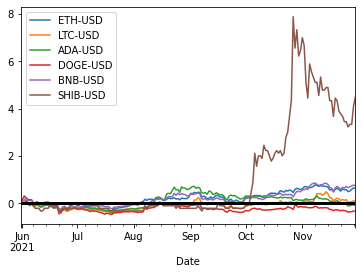

In [30]:
pf.comp_cumulative_returns().plot().axhline(y = 0, color = "black", lw = 3)

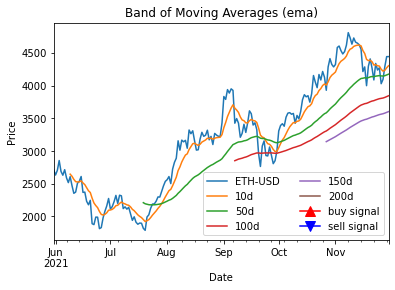

In [32]:
from finquant.moving_average import compute_ma, ema
# get stock data for ETH
dis = pf.get_stock("ETH-USD").data.copy(deep=True)
spans = [10, 50, 100, 150, 200]
ma = compute_ma(dis, ema, spans, plot=True)

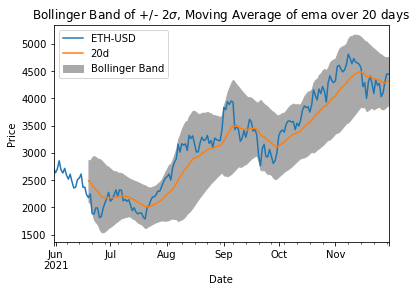

In [39]:
from finquant.moving_average import plot_bollinger_band
# get stock data for ETH
dis = pf.get_stock("ETH-USD").data.copy(deep=True)
span=20
plot_bollinger_band(dis, ema, span=span) #in the tutorial, not ema (exonential moving avarage) but sma (simple movine avarage), but it returns error


/opt/anaconda3/lib/python3.8/site-packages/finquant/monte_carlo.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)


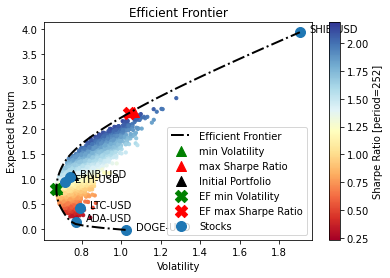

In [40]:
# performs and plots results of Monte Carlo run (5000 iterations)
opt_w, opt_res = pf.mc_optimisation(num_trials=10000) #monte carlo simulations
# plots the results of the Monte Carlo optimisation
pf.mc_plot_results()
# plots the Efficient Frontier
pf.ef_plot_efrontier()
# plots optimal portfolios based on Efficient Frontier
pf.ef.plot_optimal_portfolios()
# plots individual plots of the portfolio
pf.plot_stocks()

In [54]:
from finquant.efficient_frontier import EfficientFrontier

ef=EfficientFrontier(pf.comp_mean_returns(freq=1), pf.comp_cov())
max_sr=ef.maximum_sharpe_ratio().reset_index().rename({"index":"Crypto"},axis=1)
max_sr

,Crypto,Allocation
0,ETH-USD,5.563474e-02
1,LTC-USD,0.000000e+00
2,ADA-USD,1.601367e-16
3,DOGE-USD,1.038666e-16
4,BNB-USD,5.021051e-01
5,SHIB-USD,4.422601e-01


In [59]:
data = {i : {'Name':max_sr.iloc[i,0], "Allocation":max_sr.iloc[i,1]}for i in range(max_sr.shape[0])} 
data

{0: {'Name': 'ETH-USD', 'Allocation': 0.05563473784374599},
 1: {'Name': 'LTC-USD', 'Allocation': 0.0},
 2: {'Name': 'ADA-USD', 'Allocation': 1.60136660876109e-16},
 3: {'Name': 'DOGE-USD', 'Allocation': 1.0386656812411132e-16},
 4: {'Name': 'BNB-USD', 'Allocation': 0.50210512645448},
 5: {'Name': 'SHIB-USD', 'Allocation': 0.4422601357017739}}

In [78]:
start_date = '2021-06-01'
end_date = datetime.date.today()

pf_allocation = pd.DataFrame.from_dict(data, orient="index")
names=pf_allocation["Name"].values.tolist()

pf = build_portfolio(names=names,pf_allocation=pf_allocation, start_date=start_date ,end_date=end_date,data_api="yfinance")
pf.properties()

[*********************100%***********************]  6 of 6 completed
----------------------------------------------------------------------
Stocks: ETH-USD, LTC-USD, ADA-USD, DOGE-USD, BNB-USD, SHIB-USD
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 2.292
Portfolio Volatility: 1.041
Portfolio Sharpe Ratio: 2.197

Skewness:
    ETH-USD   LTC-USD  ADA-USD  DOGE-USD   BNB-USD  SHIB-USD
0  0.126614  0.576597   0.2591  0.815589  0.599142  1.468562

Kurtosis:
    ETH-USD  LTC-USD   ADA-USD  DOGE-USD   BNB-USD  SHIB-USD
0 -1.083201  0.56661 -0.850287  0.721114 -0.570552  0.930392

Information:
       Name    Allocation
0   ETH-USD  5.563474e-02
1   LTC-USD  0.000000e+00
2   ADA-USD  1.601367e-16
3  DOGE-USD  1.038666e-16
4   BNB-USD  5.021051e-01
5  SHIB-USD  4.422601e-01
----------------------------------------------------------------------


In [82]:
help(pf)

Help on Portfolio in module finquant.portfolio object:

class Portfolio(builtins.object)
 |  Object that contains information about a investment portfolio.
 |  To initialise the object, it does not require any input.
 |  To fill the portfolio with investment information, the
 |  function ``add_stock(stock)`` should be used, in which ``stock`` is
 |  an object of ``Stock``.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initiates ``Portfolio``.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  add_stock(self, stock)
 |      Adds a stock of type ``Stock`` to the portfolio. Each time ``add_stock``
 |      is called, the following instance variables are updated:
 |      
 |      - ``portfolio``: ``pandas.DataFrame``, adds a column with information from ``stock``
 |      - ``stocks``: ``dictionary``, adds an entry for ``stock``
 |      - ``data``: ``pandas.DataFrame``, adds a column of stock prices from ``stock``
 |      
 |      Also, the following instance variable

In [ ]:
api_key = "QcVG3MTIpQg92ZQHRHqBv5irAB8Q53joh9nsy3QjIPu1vcurykfrWsWgGHCtEKAP"
secret_key = "fHbhkxN1l970mA8yaZKSszcAGLjs4kc4f4PpvxrW48RiOojV6DAGpINxEm6Zpsw8"